# Applying Advanced Transformations (Core)

- Idea: modified version of super hero dataset with all powers as a string

https://www.kaggle.com/datasets/claudiodavi/superhero-set

# INSTRUCTOR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Potential Datasets

- Super Heroes - modified
- Yelp Results - Revisited?:
    - Lat, Long, 

## PREPARE DATASET - SUPER HEROES

- Design the student version to have a second table with a string version of the powers as a list (e.g. "['Agility','Durability']")
- Change the "name" column in the heroes table to be a combo of the name and publisher columns
- replace the individual columns for Height/Weight

In [2]:
heroes = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSfpo_ajaImuSJFMrLLVtZhUSzJusEVXGzPxyIixTQydVouT1RMuOZHI-ej3pTHOMPYQRWJM1j2wN8P/pub?output=csv",
                    index_col=0,
                    na_values=['-',-99])
heroes.info()
heroes.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      705 non-null    object 
 2   Eye color   562 non-null    object 
 3   Race        430 non-null    object 
 4   Hair color  562 non-null    object 
 5   Height      517 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  72 non-null     object 
 8   Alignment   727 non-null    object 
 9   Weight      495 non-null    float64
dtypes: float64(2), object(8)
memory usage: 63.1+ KB


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,NaN,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0


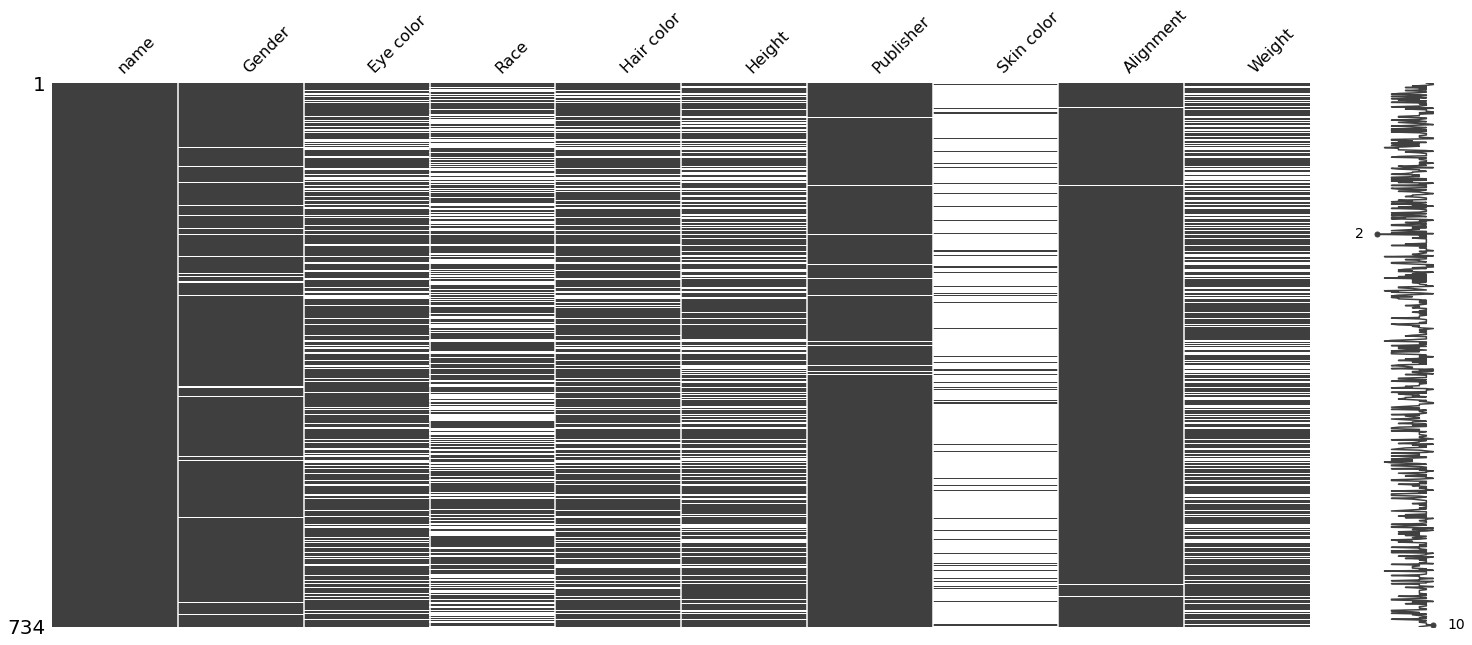

In [3]:
import missingno as ms
ms.matrix(heroes)

In [4]:
heroes = heroes.dropna(subset=['Height','Weight'])
heroes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        490 non-null    object 
 1   Gender      476 non-null    object 
 2   Eye color   471 non-null    object 
 3   Race        323 non-null    object 
 4   Hair color  470 non-null    object 
 5   Height      490 non-null    float64
 6   Publisher   489 non-null    object 
 7   Skin color  54 non-null     object 
 8   Alignment   487 non-null    object 
 9   Weight      490 non-null    float64
dtypes: float64(2), object(8)
memory usage: 42.1+ KB


In [5]:
heroes.isna().sum()

name            0
Gender         14
Eye color      19
Race          167
Hair color     20
Height          0
Publisher       1
Skin color    436
Alignment       3
Weight          0
dtype: int64

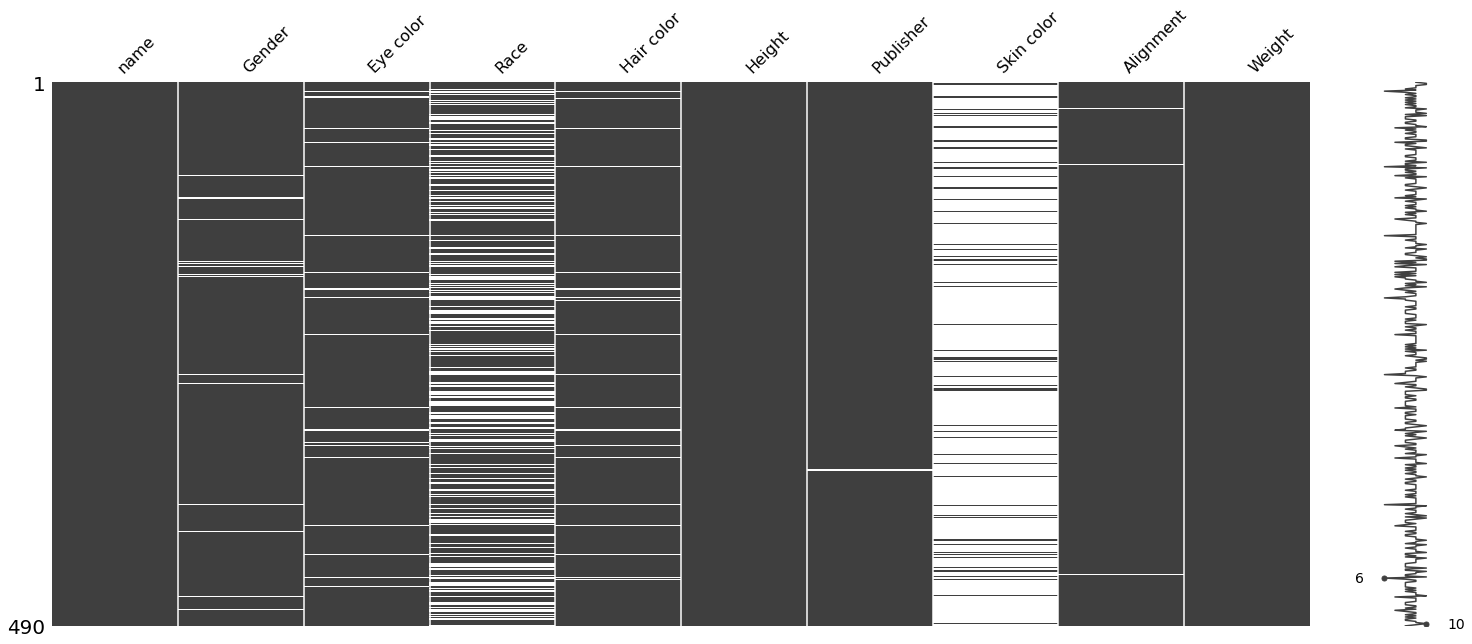

In [6]:
ms.matrix(heroes)

### Instruction Prep Steps

In [7]:
## printing column names for easy copy/paste to instructions
[print(f"- {col}") for col in heroes.columns]

- name
- Gender
- Eye color
- Race
- Hair color
- Height
- Publisher
- Skin color
- Alignment
- Weight


[None, None, None, None, None, None, None, None, None, None]

In [8]:
heroes.nunique()

name          482
Gender          2
Eye color      20
Race           51
Hair color     28
Height         48
Publisher       9
Skin color     13
Alignment       3
Weight        131
dtype: int64

In [9]:
## what are the alignments?
heroes['Alignment'].value_counts()

good       332
bad        138
neutral     17
Name: Alignment, dtype: int64

In [ ]:
powers = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTNQWUWJ45vlwSBMkUHeHcquRedO9hM-eh6JqPQ2i5-DASpG1DV6dzxGvoeoiT-zvyzWVbTYgmE8bmV/pub?output=csv',
#                     index_col=0
                    )
powers.head(2)

In [ ]:
## what heroes aren't in both?
heroes[~heroes['name'].isin(powers['hero_names'])]

In [ ]:
## drop hereos that aren't in powers

heroes = heroes[heroes['name'].isin(powers['hero_names'])]
heroes

### Modify Dataset

In [ ]:
## adding strings to numeric columsn to replace
heroes['Weight'] = heroes['Weight'].astype(str) + " kg"
heroes['Height'] = heroes['Height'].astype(str) + " cm"
heroes

In [ ]:
heroes = heroes.fillna('Unknown')

#### Merge Name and Publisher

- Make Gender, Race, Alignment into 1 dict col
- Make Height, Weight into 2nd dict col
- Make eye color, hair color, skin color into 3rd dict

In [ ]:
# row = heroes.loc[0]
# row

In [ ]:
# cat_cols = ['Gender','Race', 'Alignment']

# cat_dict = {}
# for col in cat_cols:
#     cat_dict[col] = row[col]
# cat_dict

In [ ]:
# color_cols = ['Hair color','Eye color','Skin color']

# color_dict = {}
# for col in color_cols:
#     color_dict[col] = row[col]
# color_dict

In [ ]:
# measurement_cols = ['Height','Weight']

# measures_dict = {}
# for col in measurement_cols:
#     measures_dict[col] = row[col]
# measures_dict

In [ ]:
# hero_out = pd.Series({'Categories':cat_dict,
#           'Colors':color_dict,
#           'Measurements':measures_dict})
# hero_out

In [ ]:
def convert_hero_row(row):
#     cat_cols = ["Gender","Race", "Alignment"]
#     cat_dict = {}
#     for col in cat_cols:
#         cat_dict[col] = row[col]
    
    
#     color_cols = ["Hair color","Eye color","Skin color"]
#     color_dict = {}
#     for col in color_cols:
#         color_dict[col] = row[col]

    measurement_cols = ["Height","Weight"]
    measures_dict = {}
    for col in measurement_cols:
        measures_dict[col] = row[col]
     
    copy_cols = ["name","Publisher","Gender","Race", "Alignment",
                 "Hair color","Eye color","Skin color"]
    series_dict = {col: row[col] for col in copy_cols}
#     series_dict['Colors'] = color_dict
    series_dict['Measurements'] = measures_dict
    return pd.Series(series_dict)
    
    

In [ ]:
heroes_df = heroes.apply(convert_hero_row, axis=1)
heroes_df

In [ ]:
heroes_df['Hero|Publisher'] = heroes_df['name'] + '|' + heroes['Publisher']
heroes_df

In [ ]:
heroes_df = heroes_df.drop(columns=['name','Publisher'])
heroes_df = heroes_df[['Hero|Publisher',*heroes_df.drop(columns='Hero|Publisher').columns]]
heroes_df

#### Convert OHE powers into a list of strings.

In [ ]:
powers

In [ ]:
# test hero
hero_row = powers.drop(columns='hero_names').loc[0]
hero_row

In [ ]:
# filter only where power==True and then join the index
','.join(hero_row[hero_row].index)

In [ ]:
# filter only where power==True and then join the index
','.join(hero_row[hero_row].index)

In [29]:
## save vers of powers wiht a lsit of strings as the Powers col
powers_df = powers.set_index('hero_names').apply(lambda row: ','.join(row[row==True].index),
                          axis=1).reset_index()
powers_df = powers_df.rename({0:'Powers'},axis=1)
# powers_df['Powers'] = powers_df['Powers'].astype(str)
powers_df

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."
...,...,...
662,Yellowjacket II,"Flight,Energy Blasts,Size Changing"
663,Ymir,"Cold Resistance,Durability,Longevity,Super Str..."
664,Yoda,"Agility,Stealth,Danger Sense,Marksmanship,Weap..."
665,Zatanna,"Cryokinesis,Telepathy,Magic,Fire Control,Proba..."


### Replacing hero_names with an integer id

In [30]:
# ## generate dict of hero names > i ds
# names = powers_df['hero_names'].sample(frac=1,replace=False)
# names_map = dict(zip(names, range(1,len(names)+1)))

In [31]:
# names_df = pd.DataFrame({ "Hero_ID":names_map.values(),
#                          'Hero_Name': names_map.keys()})
# names_df

In [32]:
# powers_df['hero_id'] = powers_df['hero_names'].map(names_map)
# powers_df = powers_df.drop(columns=['hero_names'])
# powers_df = powers_df[['hero_id','Powers']]
# powers_df

### Save final datasets

In [33]:
import os
folder = "Superheroes_Core/"
os.makedirs(folder,exist_ok=True)


In [34]:
# ## save names_df to csv
# names_df.to_csv(f"{folder}superhero_names.csv",index=False)
# df_names = pd.read_csv(f"{folder}superhero_names.csv")
# df_names

In [35]:
heroes_df.to_csv(f"{folder}superhero_info.csv",index=False)
df_h = pd.read_csv(f"{folder}superhero_info.csv")
df_h

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"
...,...,...,...,...,...,...,...,...
458,Yellowjacket|Marvel Comics,Male,Human,good,Blond,blue,Unknown,"{'Height': '183.0 cm', 'Weight': '83.0 kg'}"
459,Yellowjacket II|Marvel Comics,Female,Human,good,Strawberry Blond,blue,Unknown,"{'Height': '165.0 cm', 'Weight': '52.0 kg'}"
460,Yoda|George Lucas,Male,Yoda's species,good,White,brown,green,"{'Height': '66.0 cm', 'Weight': '17.0 kg'}"
461,Zatanna|DC Comics,Female,Human,good,Black,blue,Unknown,"{'Height': '170.0 cm', 'Weight': '57.0 kg'}"


In [36]:
powers_df.to_csv(f"{folder}superhero_powers.csv",index=False)

df_p = pd.read_csv(f"{folder}superhero_powers.csv")
df_p

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."
...,...,...
662,Yellowjacket II,"Flight,Energy Blasts,Size Changing"
663,Ymir,"Cold Resistance,Durability,Longevity,Super Str..."
664,Yoda,"Agility,Stealth,Danger Sense,Marksmanship,Weap..."
665,Zatanna,"Cryokinesis,Telepathy,Magic,Fire Control,Proba..."


# SEE `Applying Advanced Transformations (CORE).ipynb` for ASSIGNMENT + SOLUTION

<!-- # Assignment

## Practicing Advanced Transformations with Super Heroes

We will be using a heavily modified version of the Superheroes dataset from Kaggle: https://www.kaggle.com/datasets/claudiodavi/superhero-set

- The dataset includes 3 csv's:
    1. superhero_info.csv: Name, Publisher, Demographic Info and Body measurements.
    2. superhero_powers.csv: Hero ID and list of powers.
    3. superhero_names.csv: Hero ID and Hero Name lookup
    
    
Your task is two-fold:
- **I. Clean the files and combine into 1 final dataframe.**
    - This dataframe should have the following columns:
        - Name
        - Publisher
        - Gender
        - Eye color
        - Race
        - Hair color
        - Height
        - Skin color
        - Alignment
        - Weight
        - Plus one-hot-encoded columns for every power that appears in the dataset. <br>E.g.:
            - Agility
            - Flight
            - Superspeed
            - etc.


- **II. Use your combined dataframe to answer the following questions.**
    1. What are the top 3 most common powers?
    2. What is the average height for each Gender?
    3. What is the average height of heroes for each publisher?
    4. What is the average weight for each Alignment?
    5. How many heroes have the word "man" in their names? 

 -->

In [ ]:
raise Exception('See the notebook in the header above for the solution.')

# Previous Solution

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
folder = "Superheroes_Core/"
os.listdir(folder)

In [ ]:
powers_df = pd.read_csv(folder+'superhero_powers.csv')
powers_df.info()
powers_df.head(3)

In [ ]:
heroes_df = pd.read_csv(folder+'superhero_info.csv')
heroes_df.info()
heroes_df.head(3)

## Cleaning the DataFrames

### Hero Info

In [ ]:
heroes_df

- Things to fix:
    - Separate Hero and Publisher
    - Convert columns of dictionaries into separate columns
    - Make sure Measurements are numeric so averages can be calculated.

In [ ]:
## separate hero and publisher
heroes_df[['Hero','Publisher']]  = heroes_df['Hero|Publisher'].str.split("|",expand=True)
heroes_df = heroes_df.drop(columns=['Hero|Publisher'])
heroes_df

- Convert string-dictionary columns into actual dictionaries:
    - Replace all single quotes with double quotes in the dictionary columns
    - Use json.loads


In [ ]:
heroes_df.loc[0,'Colors']

In [ ]:
## convert string-dict columns to actual dicts
import json

In [ ]:
## Clean and separate Colors
heroes_df['Colors'] = heroes_df['Colors'].str.replace("'",'"')
heroes_df['Colors'] = heroes_df["Colors"].apply(json.loads)

heroes_df = pd.concat([heroes_df.drop(columns='Colors'),
                       heroes_df['Colors'].apply(pd.Series)],
                      axis=1)
heroes_df

In [ ]:
## Clean and separate Measurements
heroes_df['Measurements'] = heroes_df['Measurements'].str.replace("'",'"')
heroes_df['Measurements'] = heroes_df["Measurements"].apply(json.loads)

heroes_df = pd.concat([heroes_df.drop(columns='Measurements'),
                       heroes_df['Measurements'].apply(pd.Series)],
                      axis=1)
heroes_df

In [ ]:
## remove 'cm' and 'kg' to conver measurement cols to numeric
heroes_df['Height'] = heroes_df['Height'].str.replace(' cm','')
heroes_df['Height'] = heroes_df['Height'].astype(float)
heroes_df

In [ ]:
## remove 'cm' and 'kg' to conver measurement cols to numeric
heroes_df['Weight'] = heroes_df['Weight'].str.replace(' kg','')
heroes_df['Weight'] = heroes_df['Weight'].astype(float)
heroes_df

In [ ]:
heroes_df

### Cleaning Powers_df

In [ ]:
powers_df

- To make One Hot encoded powers, must first get list of unique powers.

In [ ]:
## Use .split to make Powers a list of powers
powers_df['Powers_split'] =powers_df['Powers'].str.split(',')
powers_df

In [ ]:
explode_powers = powers_df.explode('Powers_split')
unique_powers = explode_powers['Powers_split'].unique()
unique_powers

In [ ]:
## use a loop and .str.contains to create one hot encoded powers
for power in unique_powers:
    powers_df[power] = powers_df['Powers'].str.contains(power)
powers_df

In [ ]:
powers_df = powers_df.drop(columns=['Powers','Powers_split'])
powers_df

### Merge DataFrames

In [ ]:
heroes_df

In [ ]:
df = pd.merge(heroes_df, powers_df, left_on='Hero', right_on='hero_names')
df

## EDA 

- Questions to Answer:
    1. What is the most common power?
    2. What is the average height for each Gender?
    3. What is the average height of heroes for each publisher?
    4. What is the average weight for each Alignment?
    5. How many heroes have the word "man" in their names? 


### 1. What is the most common power?

In [ ]:
df[unique_powers].sum().sort_values(ascending=False).head(3)

- The 3 most common powers are Super Strenght, Stamina, and Durability.

### 2. What is the average height for each Gender?

In [ ]:
## using pandas
df.groupby('Gender')['Height'].mean()

In [ ]:
## or using visualizatons
sns.barplot(data=df, x='Gender',y='Height')

### 3. What is the average height of heroes for each publisher?

In [ ]:
## using pandas
df.groupby("Publisher")['Height'].mean().sort_values()

In [ ]:
## using visualziations
ax = sns.barplot(data=df, y='Publisher',x='Height')
# ax.set_xticklabels( ax.get_xticklabels(),rotation=45, ha='right')

### 4. What is the average weight for each Alignment?

In [ ]:
## using pandas
df.groupby('Alignment')['Weight'].mean()

In [ ]:
## using visuals
sns.barplot(data=df,x='Alignment',y='Weight')

### 5. How many heroes have the word "man" in their names?

In [ ]:
df['Hero'].str.contains('man',case=False).value_counts()

- 42 heroes